## Khanh Do

## CS109 - 01

## Introduction

In this project, we aim to write functions to determine the best price of each espresso shot in the situation of opening the coffee bar. If we set the price too low, we will not earn enough profit to maintain the business, and no customers will buy the coffee if we set the price too high. 

To determine the most efficient price, we will divide this project into four main parts. Firstly, we create a random, normally distributed list of the maximum prices each customer could pay for an espresso shot. Secondly, we compute the number of customers that would buy the coffee at any given price and plot the demand curve for prices and quantities of sales. Following that, we calculate the profit of each price and determine the price and number of customers willing to purchase that will net the coffee shop the most profits. Lastly, we illustrate the regression line that best estimates the demand in the plot from part 2.

## Part 1: Poll customers

In this part, we stimulate a model - asking 1000 potential customers for the maximum prices that they are able to purchase for an espresso shot. We write the <code>randCustomers(n)</code> to generate a list of n maximum prices that each customer would pay. Moreover, this list consists of normally distributed values with chosen mean and standard deviation. We create a <code>for</code> loop that is repeated n times. In each iteration of the loop, we assign a variable and use the function from <code>random</code> library: <code>s=random.gauss(mu, sigma)</code> to execute random values chosen from a normal distribution with mean mu (4 dollars) and standard deviation sigma (1.50 dollars). Following that, we use the <code>list.append()</code> to add each value into the <code>customerList</code>. Finnally, based on the created list, we plot a histogram to distribute these maximum price by using the statement <code>pyplot.hist()</code> from <code>matplotlib.pyplot</code> library.

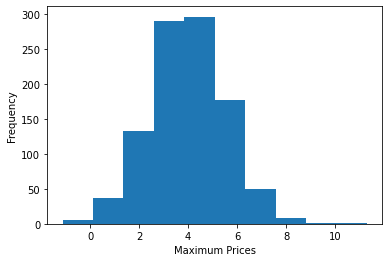

[6.7036634653603, 2.640855931761418, 3.841956589379152, 4.182474932446587, 5.457389876076539, 4.458346749320053, 3.4291815589187338, 4.742792332035981, 3.9949496274557283, 5.18447513717759, 3.833641622250451, 3.1826982493592486, 4.736648574276789, 5.262016031855468, 1.6800428754777403, 3.67731879687775, 4.585621865143269, 5.869784661712549, 4.2752350733469076, 2.4015741799312735, 6.4935741834656895, 1.9930649359749153, 5.0110926692087485, 2.0367826098427764, 2.6942417047309375, 2.828047903802363, 5.397310128977891, 4.3976328371276345, 4.206680450019073, 5.222007538058152, 2.4267723625693183, 3.5696265887746117, 4.739312850992611, 3.529306223331129, 1.8901400704047493, 6.032974152389018, 3.5962693474108542, 0.9142027459405764, 3.1118065234798844, 4.126403111117454, 5.927418516509386, 3.7353720466119564, 4.373627388953667, 1.8196154482573874, 3.5174403359048547, 1.806337412251981, 4.249782944555907, 6.244059283666103, 4.205510826449503, 6.546971030592568, 4.418115257802567, 3.58435157167

In [30]:
import random
import matplotlib.pyplot as pyplot

def randCustomers(n):
    '''
    Generate a list of normally distributed values with mean and standard deviation
    Plot the histogram of these values
    
    Parameter: integer n
    Return value: list of n normally distributed values
    '''
    customerList=[]              # list used to store the maximum prices of each customer
    
    for i in range(n):
        s=random.gauss(4, 1.5)   # execute the normally distributed values with mean and standard deviation
        customerList.append(s)
        
    # plot the histogram
    pyplot.hist(customerList)
    pyplot.xlabel("Maximum Prices")
    pyplot.ylabel("Frequency")
    pyplot.show()
    
    return customerList

def main():
    print(randCustomers(1000))
main()

## Part 2: Compute sales

Part 2 consists of writing the function <code>sales(customers, price)</code> to determine how many customers would buy coffee at any given price. We use the <code>for</code> loop in this function to determine whether each value in the <code>customers</code> list – which is generated from <code>randCustomers(n)</code> in part 1 – is greater than or equal to the given <code>price</code> value; if it is, one more customer is willing to pay for the coffee at this price. To plot the demand curve, we later write the function <code>plotDemand(customers, low price, high price, step)</code>. We also use the <code>randCustomers(n)</code> function from Part 1 to assign the <code>customers</code> list variable and the function <code>sales(customers, price)</code> to compute the quantity of sales in this function. To be specific, we create a list called <code>salesList</code> to store the quantity of customers for each maximum price. We then use the <code>for</code> loop to examine each price in the range [lowPrice, highPrice, step], inserting the price and number of customers for each into the <code>priceList</code> and <code>salesList</code> by the <code>list.append()</code>. Following that, we plot the demand curve using the <code>matplotlib.pyplot</code> library's <code>pyplot.plot()</code> function and label the priceList as horizontal values and the salesList as vertical ones. Notably, the variables in the range should be integers, so we need to transform them by inserting <code>int()</code>.

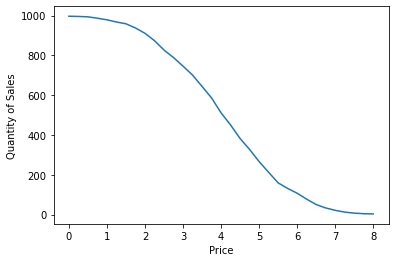

In [31]:
import matplotlib.pyplot as pyplot
import random

def randCustomers(n):
    '''
    Generate a list of normally distributed values with mean and standard deviation
    
    Parameter: integer n
    Return value: list of n normally distributed values
    '''
    customerList=[]                  # list used to store the maximum prices of each customer
    
    for i in range(n):
        s=random.gauss(4, 1.5)       # execute the normally distributed values with mean and standard deviation
        customerList.append(s)
        
    return customerList

def sales(customers, price):
    '''
    Compute the number of customers would be able to buy espresso at a given price
    
    Parameters: list customers, float price
    Return value: number of customers
    '''
    count=0                          # number of customers would buy at given price
    
    for i in range(len(customers)):
        if customers[i]>=price:
            count=count+1            # calculate number of customers
            
    return count

def plotDemand(customers, lowPrice, highPrice, step):
    '''
    Plot the demand curve with number of willing customers following by each price
    
    Parameters: list customers; float lowPrice, highPrice, step
    Return value: None
    '''
    priceList=[]                     # list used to store the value of maximum prices 
    salesList=[]                     # list used to store the quantity of sales
    
    for p in range(int(lowPrice), int(highPrice*4)+1, int(step*4)):
        priceList.append(p/4)
        sales_count=sales(customers, p/4)   # calculate the number of customers willing to buy for each price 
        salesList.append(sales_count)
        
    # plot the results
    pyplot.plot(priceList, salesList)
    pyplot.xlabel('Price')
    pyplot.ylabel('Quantity of Sales')
    pyplot.show()
    
def main():
    customers=randCustomers(1000)
    plotDemand(customers, 0, 8, 0.25)
main()

## Part 3: Compute profits

In this section, we write the function <code>profits(customers, lowPrice, highPrice, step, perCost, fixedCost)</code> to compute the profit at each price in the <code>customers</code> list, which is generated from <code>randCustomers(n)</code> in part 1. To compute the profit of each coffee shot, we use the <code>for</code> loop to examine each price in the range [lowPrice, highPrice, step]: calculate the quantity of customers for each coffee shot, and the revenue is equal to the multiple of the price and quantity of customer per shot. Then, we can compute the expense of each coffee shot: the sum of <code>fixedCost</code> and the cost of each shot, including the "to-go" cups. The cost of each coffee shot is calculated by adding the normal cost of each shot (perCost * quantity of customer) and the "to-go" shot (quantity of customer/2 * 0.05). After that, the profit of each shot is the difference between the value of revenue and expense. Assuming that the cost of one pound of roasted coffee beans is 10 dollars and we need to use 8g of coffee for pershot of espresso, so we can calculate the perCost value is (10/454) * 8 = 0.1762 dollars. Eventually, we store the value of profit, price, and customers number in three lists - <code>profitList</code>, <code>priceList</code>, <code>salesList</code> by using the <code>list.append()</code>. We plot the profit at each price using the <code>matplotlib.pyplot</code> library's <code>pyplot.plot()</code> function and label the priceList as horizontal values and the profitList as vertical ones. Following that, we find the maximum profit by tracing the maximum value and its index in the <code>profitList</code>. After finding the index, we can easily find the most profitable price and the number of customers which are able to buy at this price. Like in part 2, the parameters in the price range of <code>for</code> loop should be in the integer form, so we need to transform them by inserting <code>int()</code>.

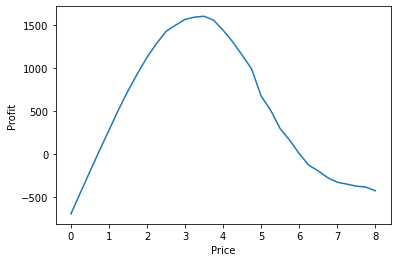

(1607.9332, 3.5, 639)


In [32]:
import matplotlib.pyplot as pyplot
import random

def randCustomers(n):
    '''
    Generate a list of normally distributed values with mean and standard deviation
    
    Parameter: integer n
    Return value: list of n normally distributed values
    '''
    customerList=[]                 # list used to store the maximum prices of each customer
    
    for i in range(n):
        s=random.gauss(4, 1.5)      # execute the normally distributed values with mean and standard deviation
        customerList.append(s)
        
    return customerList

def sales(customers, price):
    '''
    Compute the number of customers would be able to buy espresso at a given price
    
    Parameters: list customers, float price
    Return value: number of customers
    '''
    count=0                         # number of customers would buy at given price
    
    for i in range(len(customers)):
        if customers[i]>=price:
            count=count+1           # calculate number of customers
    return count

def profits(customers, lowPrice, highPrice, step, perCost, fixedCost):
    '''
    Plot the profits at each price. Calculate the maximum profit, the price that gain the largest profit, 
    and number of customers would be albe to buy at that price
    
    Parameters: list customers; float lowPrice, highPrice, step, perCost, fixedCost
    Return value: maximum profit, maximum profitable price, maximum profitable number of customers
    '''
    priceList=[]                    # list used to store the value of maximum prices 
    salesList=[]                    # list used to store the quantity of sales
    profitList=[]                   # list used to store the profit at prices
    
    for p in range(int(lowPrice), int(highPrice*4)+1, int(step*4)):
        sales_count=sales(customers, p/4)     # calculate the number of customers willing to buy for each price 
        revenue=sales_count*(p/4)             # calculate the revenue at each price
        take_away=sales_count*(0.05/2)        # calculate the cost of to-go cups
        expense=fixedCost+perCost*sales_count+take_away   # calculate total costs at each price
        profit=revenue-expense                # calculate the profit at each price
        profitList.append(profit)
        priceList.append(p/4)
        salesList.append(sales_count)
    
    # plot the results
    pyplot.plot(priceList, profitList)
    pyplot.xlabel('Price')
    pyplot.ylabel('Profit')
    pyplot.show()
    
    max_profit=profitList[0]
    max_price=0
    max_index=0
    max_sales=0

    # find the maximum profit
    for i in range(len(profitList)):
        if profitList[i]>max_profit:
            max_profit=profitList[i]      # calculate the maximum profit
            max_index=i                   # calculate the position of maximum profit in the list
    max_price=priceList[max_index]        # calculate the price at which maximum profit is attained
    max_sales=salesList[max_index]        # calculate the number of customers willing to buy to gain best profit
    return max_profit, max_price, max_sales

def main():
    customers=randCustomers(1000)
    print(profits(customers, 0, 8, 0.25, 0.1762, 500))
main()

<b>Question 7.3.1: How should you price a shot of espresso to maximize your profit? At this price, how much profit do you expect each day? How many customers should you expect each day?</b>

In the price range from free to 8 dollars, the coffee shop should set the price from 3 to 3.5 dollars to earn the most profits - which is in the range [1500, 1700] dollars. At this range of price, the coffee shop can attract approxiamately 60% - 80% of 1000 potential daily customers buying coffee, which are 600 - 800 people.

## Part 4: Find the demand function

In the last section, we need to find the linear function that best estimates the demand in the demand curve from part 2 - which is the demand function: 

$$ Quantity = b - m*Price $$

To find this function, we need to write the program <code>linearRegression(x,y)</code> to compute the coefficients of the linear regression function - the slope and intercept - based on the math formulas. After that, we write the <code>plotRegression(customers, lowPrice, highPrice, step) </code> function to plot the demand curve's regression line. In this function, we easily use the previous <code>linearRegression(x,y)</code> function to calculate the slope and intercept of demand function then illustrate the regression line in the scatter plot using the <code>matplotlib.pyplot</code> library's <code>pyplot.scatter()</code> and <code>pyplot.plot()</code>

-159.548128342246
1134.4349376114083


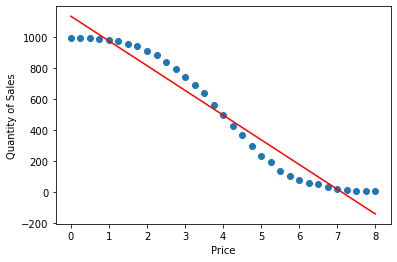

In [39]:
import matplotlib.pyplot as pyplot
import random

def randCustomers(n):
    '''
    Generate a list of normally distributed values with mean and standard deviation
    
    Parameter: integer n
    Return value: a list of n normally distributed values
    '''
    customerList=[]               # list used to store the maximum prices of each customer
    
    for i in range(n):
        s=random.gauss(4, 1.5)    # execute the normally distributed values with mean and standard deviation
        customerList.append(s)
        
    return customerList

def sales(customers, price):
    '''
    Compute the number of customers would be able to buy espresso at a given price
    
    Parameters: list customers, float price
    Return value: number of customers
    '''
    count=0                       # number of customers would buy at given price
    
    for i in range(len(customers)):
        if customers[i]>=price:
            count=count+1         # calculate number of customers
    return count

def linearRegression(x,y):  
    '''
    Calculate the coefficients of the linear regression fuction of a small dataset 
    including one independent and dependent variable
    
    Parameters: list x - independent variable, list y - dependent variable
    Return value: the slope and intercept of regression line
    '''
    points=len(x)              # number of points
    sum_x=0                    # sum of x_coordinates
    sum_y=0                    # sum of y_coordinates
    sum_xx=0                   # sum of squares of x_coordinates
    sum_xy=0                   # sum of products of x and y coordinates
    
    # calculate the sums
    for i in range(points):
        sum_x=sum_x+x[i]
        sum_y=sum_y+y[i]
        sum_xx=sum_xx+x[i]*x[i]
        sum_xy=sum_xy+x[i]*y[i]
    sum_x2=sum_x**2            # square of sum of x_coordinates
    
    slope=(points*sum_xy-sum_x*sum_y)/(points*sum_xx-sum_x2)      # calculate the slope of the line
    intercept=(sum_y-slope*sum_x)/points                          # calculate the intercept of the line
    return slope, intercept

def plotRegression(customers, lowPrice, highPrice, step):
    '''
    Compute the linear regression function that best approximates the demand
    Plot the demand curve with the regression line
    
    Parameters: list customers; float lowPrice, highPrice, step
    Return values: the slope and intercept of demand function
    '''
    priceList=[]              # list used to store the value of maximum prices 
    salesList=[]              # list used to store the quantity of sales
    
    for p in range(int(lowPrice), int(highPrice*4)+1, int(step*4)):
        priceList.append(p/4)
        sales_count=sales(customers, p/4)    # calculate the number of customers willing to buy for each price
        salesList.append(sales_count)
        
    pyplot.scatter(priceList, salesList)              # generate scatter plot
    m, b = linearRegression(priceList, salesList)     # calculate the slope and intercept of demand function
    print(m)
    print(b)
    minX = min(priceList) 
    maxX = max(priceList)
    
    # plot the regression line
    pyplot.plot([minX, maxX], [m * minX + b, m * maxX + b], color = 'red') 
    pyplot.xlabel('Price')
    pyplot.ylabel('Quantity of Sales')
    pyplot.show()
    
def main():
    customers=randCustomers(1000)
    plotRegression(customers, 0, 8, 0.25)
main()

<b>Question 7.3.2: What is the linear demand function that best approximates your demand curve?</b>

After testing the program for multiple times, the slope value of demand - m - function runs from 155 to 161, and the intercepts of demand function is roughly in the range [1119, 1145]. So the linear demand function that best estimate the demand curve is:

$$ Quantity = 1132 - 157.5 * Price $$